In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [45]:
raw_data_path = 'data/data.csv'
# data_path = 'data/trading/8_deri-1_gt_ignr.csv'
data_path = 'data/trading/analysis/8_delta_gt_ignr.csv'
raw_data = pd.read_csv(raw_data_path)
data = pd.read_csv(data_path)

data.insert(0, 'date', raw_data['date'])
data.insert(0, 'index', np.arange(data.shape[0]))

data.insert(0, 'btc_diff', data['price_btc'].diff())
data.insert(0, 'gold_diff', data['price_gold'].diff())
data.insert(0, 'btc_value', data['price_btc'] * data['btc_balance'])
data.insert(0, 'gold_value', data['price_gold'] * data['gold_balance'])

data.describe()

,gold_value,btc_value,gold_diff,btc_diff,index,Unnamed: 0,cash_balance,btc_balance,gold_balance,price_btc,...,sell_btc,sell_gold,sell_btc_ratio,sell_gold_ratio,buy_no_ratio,buy_btc_ratio,buy_gold_ratio,buy_btc,buy_gold,cash_remain
count,1776.000000,1776.000000,1775.000000,1775.000000,1776.000000,1776.000000,1776.0,1776.000000,1.776000e+03,1776.000000,...,1776.0,1776.0,1776.0,1776.0,1776.0,1776.0,1776.0,1776.000000,1776.000000,1776.0
mean,571.472094,8747.487269,0.294423,25.727713,887.500000,887.500000,0.0,0.698006,3.891509e-01,12532.114413,...,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.281532,0.281532,0.0
std,97.694940,9844.161961,11.627504,818.920528,512.831356,512.831356,0.0,0.000000,1.110536e-16,14103.268769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.864475,11.864475,0.0
min,438.067198,477.219517,-104.849976,-7742.910156,0.000000,0.000000,0.0,0.698006,3.891509e-01,683.690002,...,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.000000,0.000000,0.0
25%,492.811038,2983.990633,-2.450012,-102.155762,443.750000,443.750000,0.0,0.698006,3.891509e-01,4275.023315,...,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.000000,0.000000,0.0
50%,518.086384,5624.718390,0.000000,5.182129,887.500000,887.500000,0.0,0.698006,3.891509e-01,8058.270020,...,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.000000,0.000000,0.0
75%,672.803052,7847.973215,3.125000,139.927979,1331.250000,1331.250000,0.0,0.698006,3.891509e-01,11243.422852,...,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.000000,0.000000,0.0
max,804.433335,44361.362235,80.349976,7436.199219,1775.000000,1775.000000,0.0,0.698006,3.891509e-01,63554.441406,...,0.0,0.0,0.0,0.0,0.0,0.5,0.5,500.000000,500.000000,0.0


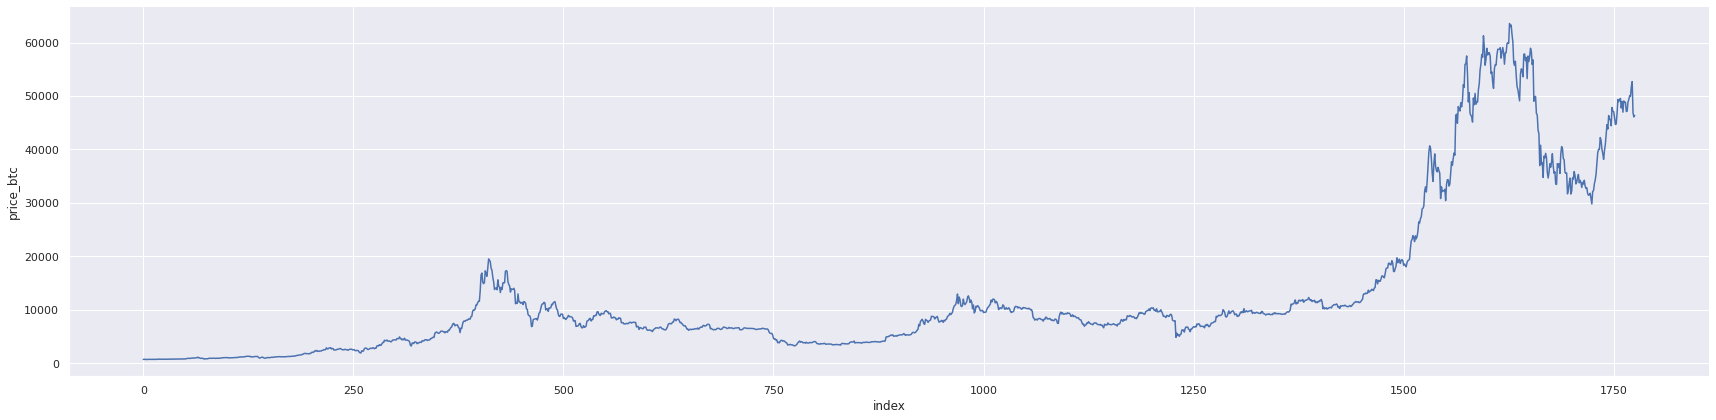

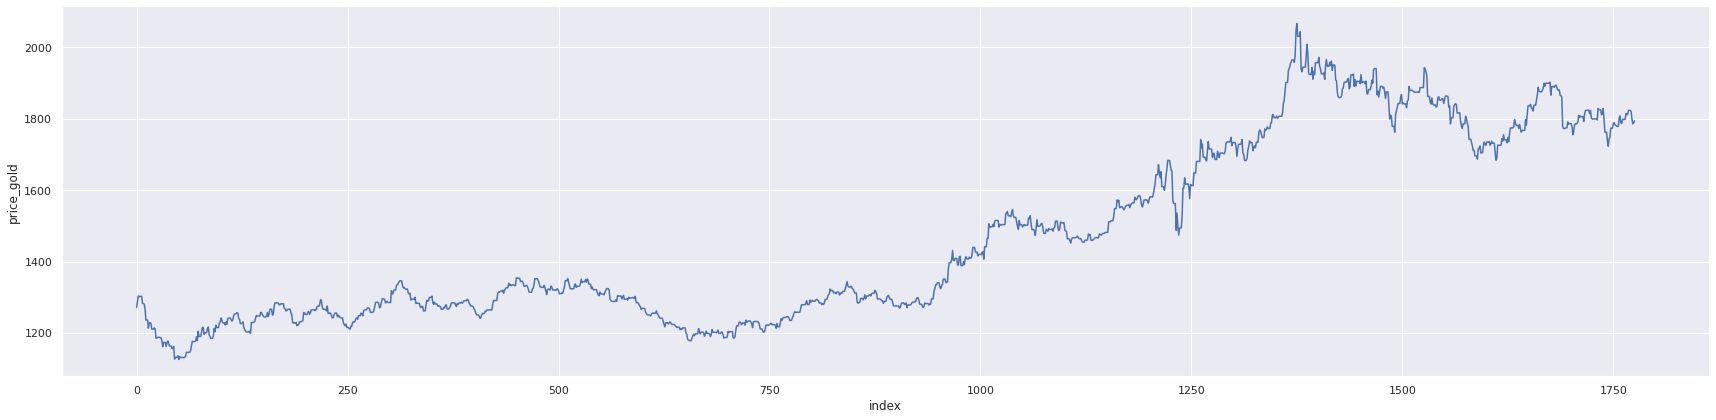

In [46]:
sns.relplot(x='index', y="price_btc", kind="line", data=data, height=6, aspect=4)
sns.relplot(x='index', y="price_gold", kind="line", data=data, height=6, aspect=4)

In [47]:
sns.set(rc={'figure.figsize':(64, 16)})


<AxesSubplot:>

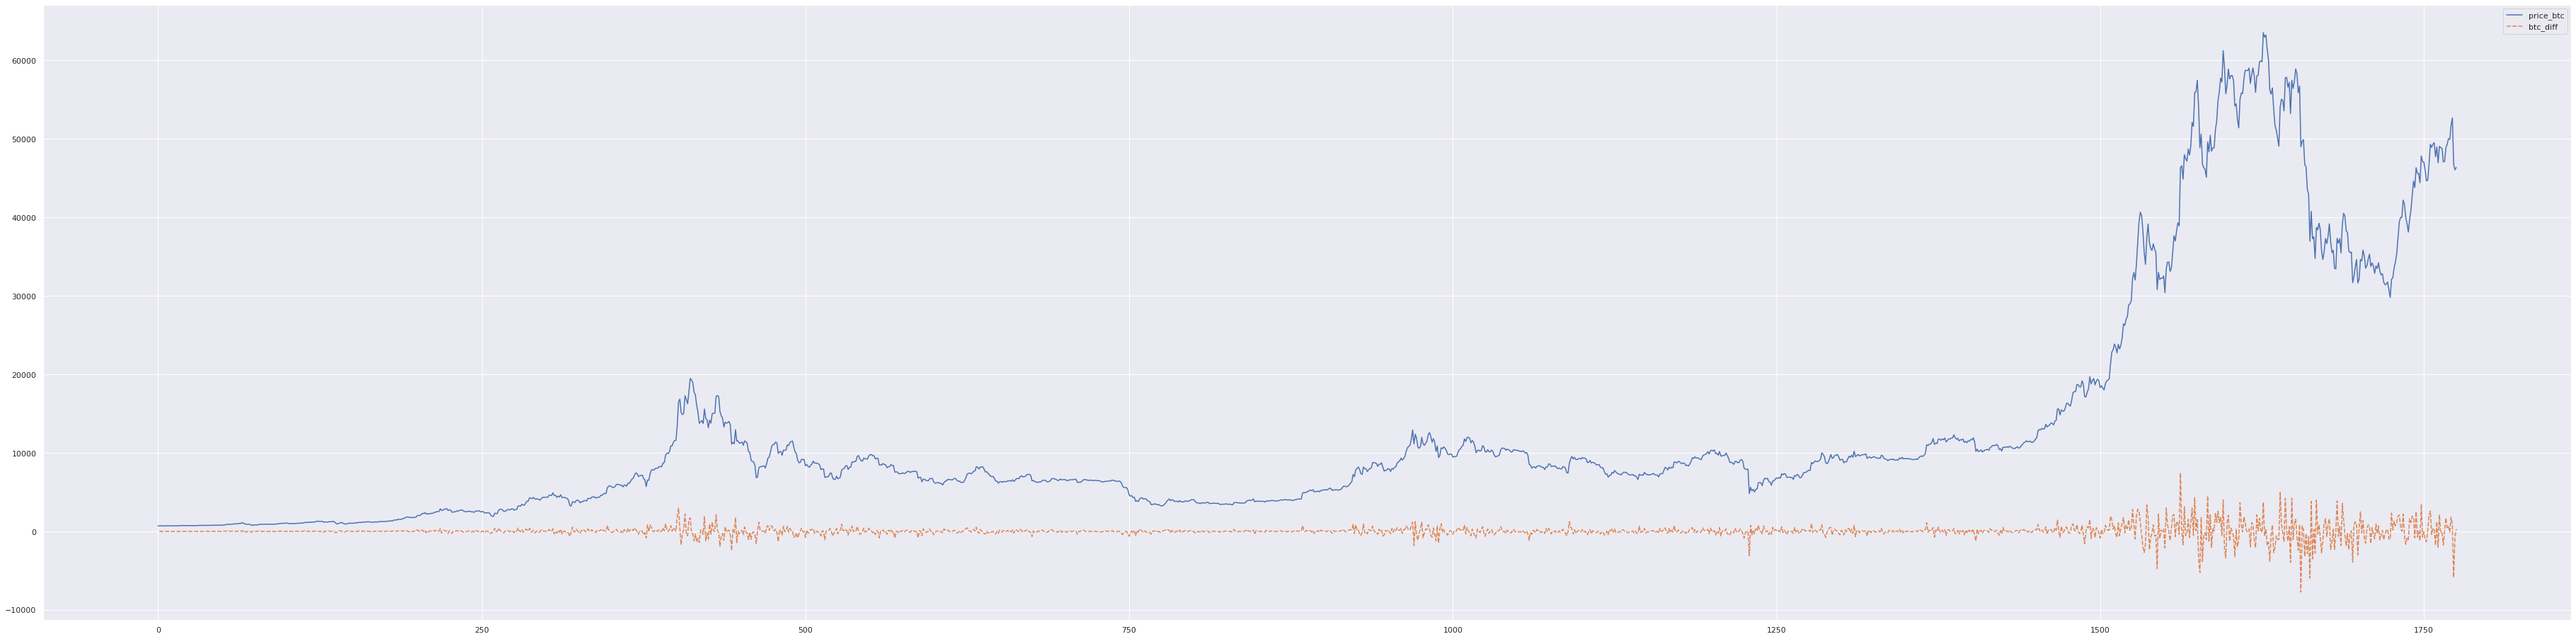

In [48]:
BTC = pd.DataFrame(data=data, columns=['price_btc', 'btc_diff'])
sns.lineplot(data=BTC)

<AxesSubplot:>

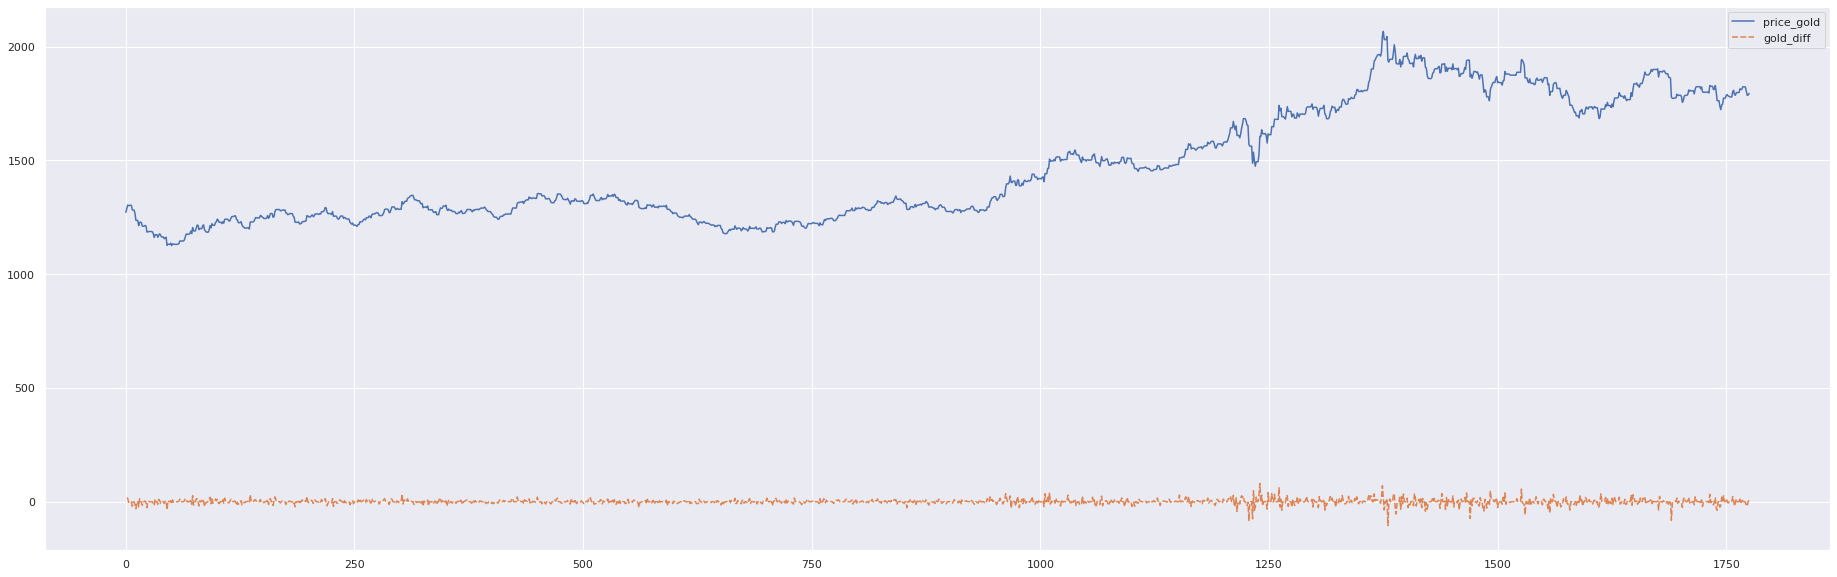

In [49]:
sns.set(rc={'figure.figsize':(32, 10)})
GLD = pd.DataFrame(data=data, columns=['price_gold', 'gold_diff'])
# sns.heatmap(data=pd.DataFrame(data=data, columns=['gold_diff']))
sns.color_palette("Blues",)
sns.lineplot(data=GLD, )

<AxesSubplot:>

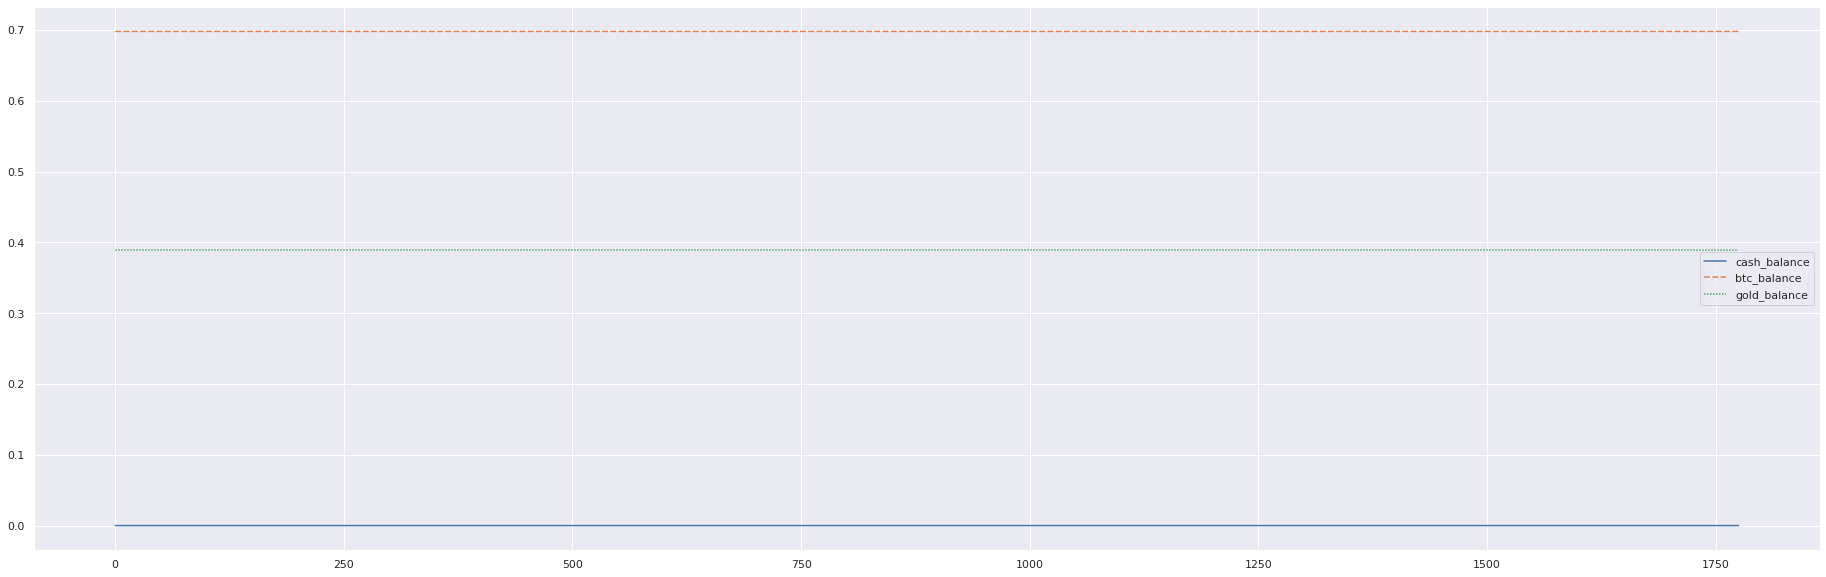

In [50]:
balance = pd.DataFrame(data=data, columns=['cash_balance', 'btc_balance', 'gold_balance'])
sns.lineplot(data=balance)


# Policy in Different Periods

## Stable Periods

In [51]:
data_stable     = data[:100]
data_turb_tiny  = data[450:550]
data_turb_huge  = data[1600:1750]
data_asc_huge   = data[1550:1650]
data_desc_huge  = data[1700:1800]

### Distribution of Value

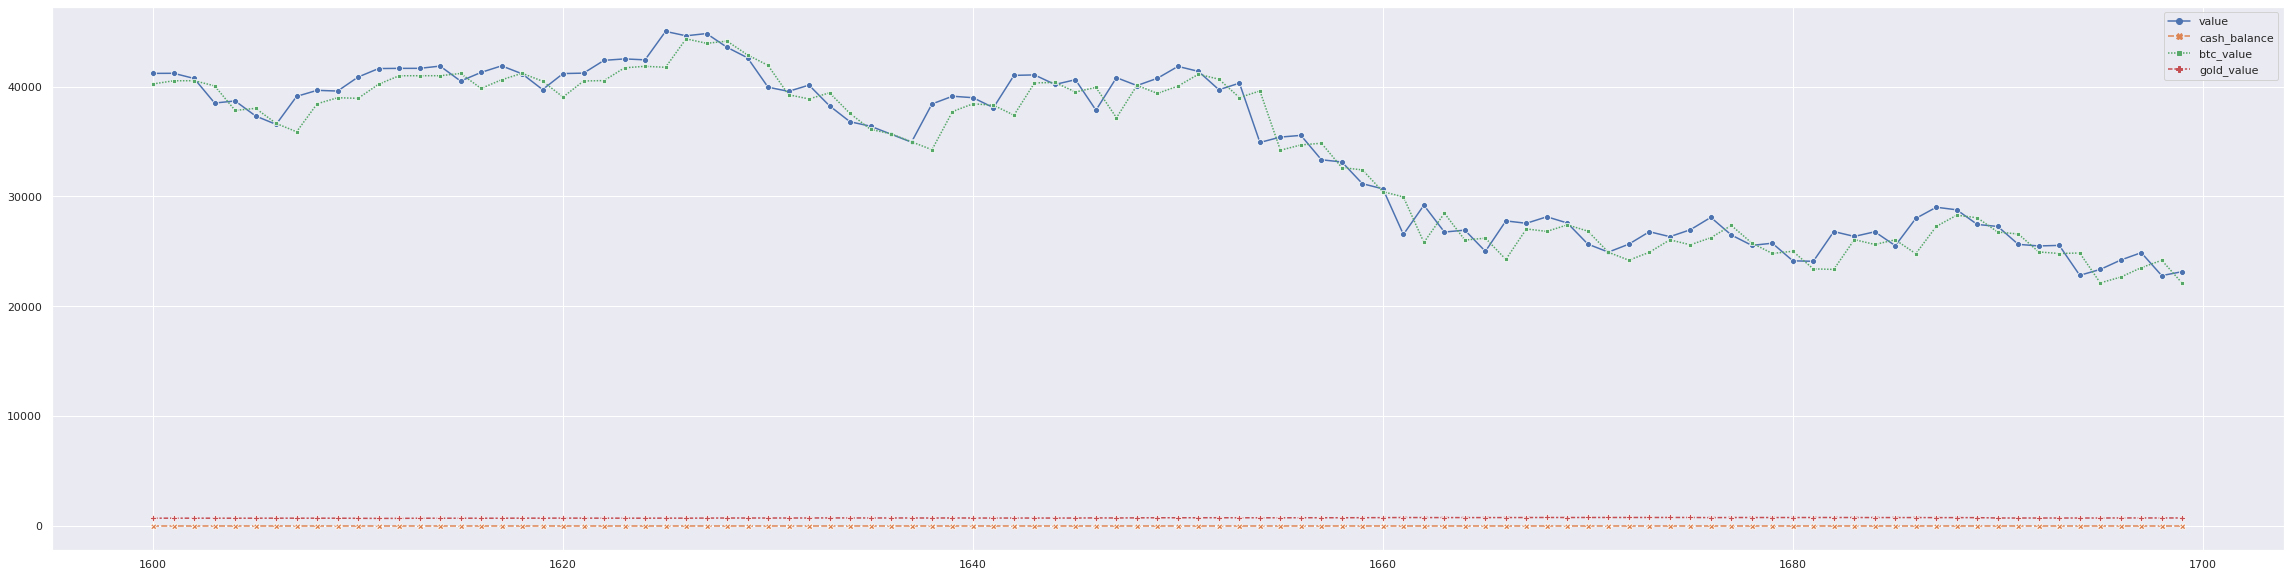

In [52]:
sns.set(rc={'figure.figsize':(40, 10)})
lo = 1600
hi = 1700
val = pd.DataFrame(data=data[lo:hi], columns=['value', 'cash_balance', 'btc_value', 'gold_value'])
# sns.heatmap(data=pd.DataFrame(data=data, columns=['gold_diff']))
sns.color_palette("Blues")
sns.lineplot(data=val, markers=True)
plt.savefig(os.path.join("data", "trading", f"value-distrib_{lo}:{hi}.pdf"))

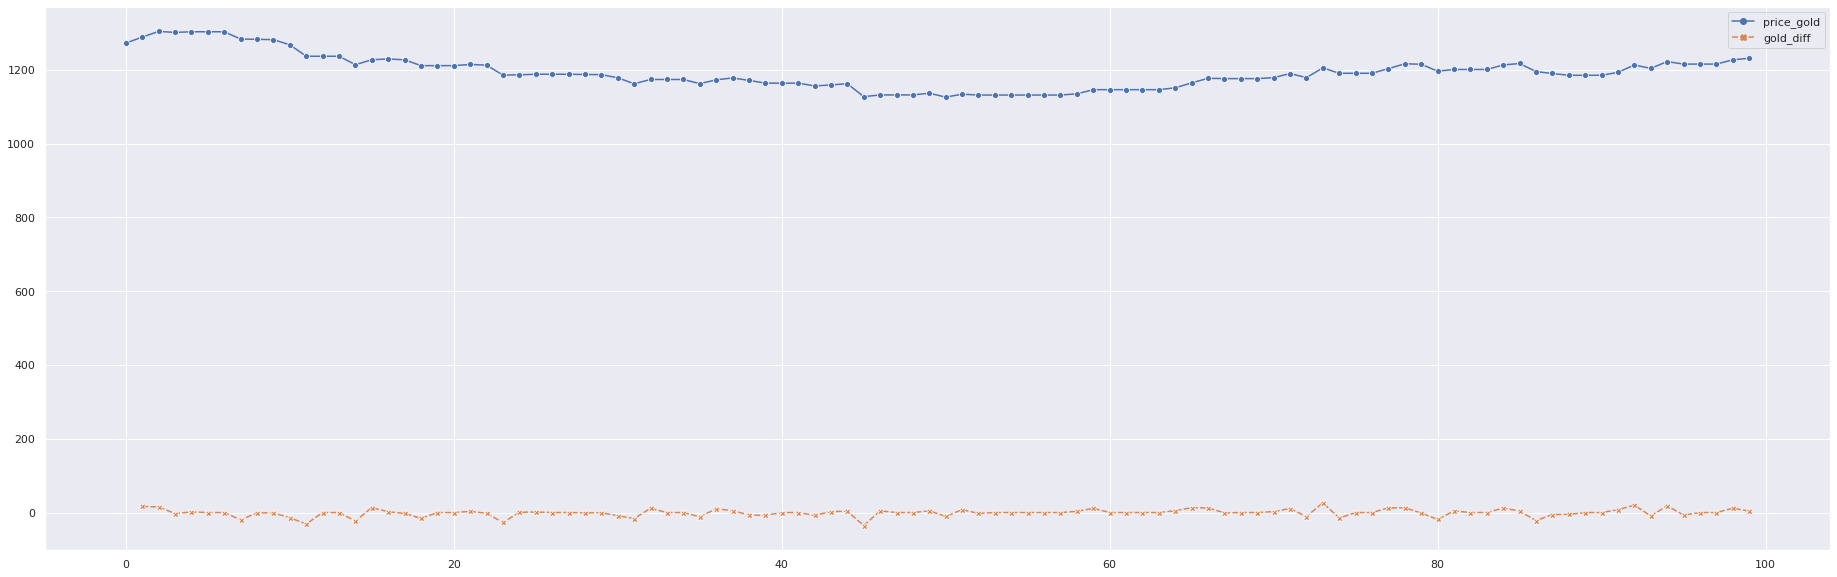

In [53]:
sns.set(rc={'figure.figsize':(32, 10)})
GLD = pd.DataFrame(data=data_stable, columns=['price_gold', 'gold_diff'])
# sns.heatmap(data=pd.DataFrame(data=data, columns=['gold_diff']))
sns.color_palette("Blues")
sns.lineplot(data=GLD, markers=True)
plt.savefig(os.path.join("data", "trading", f"stable_gold.pdf"))

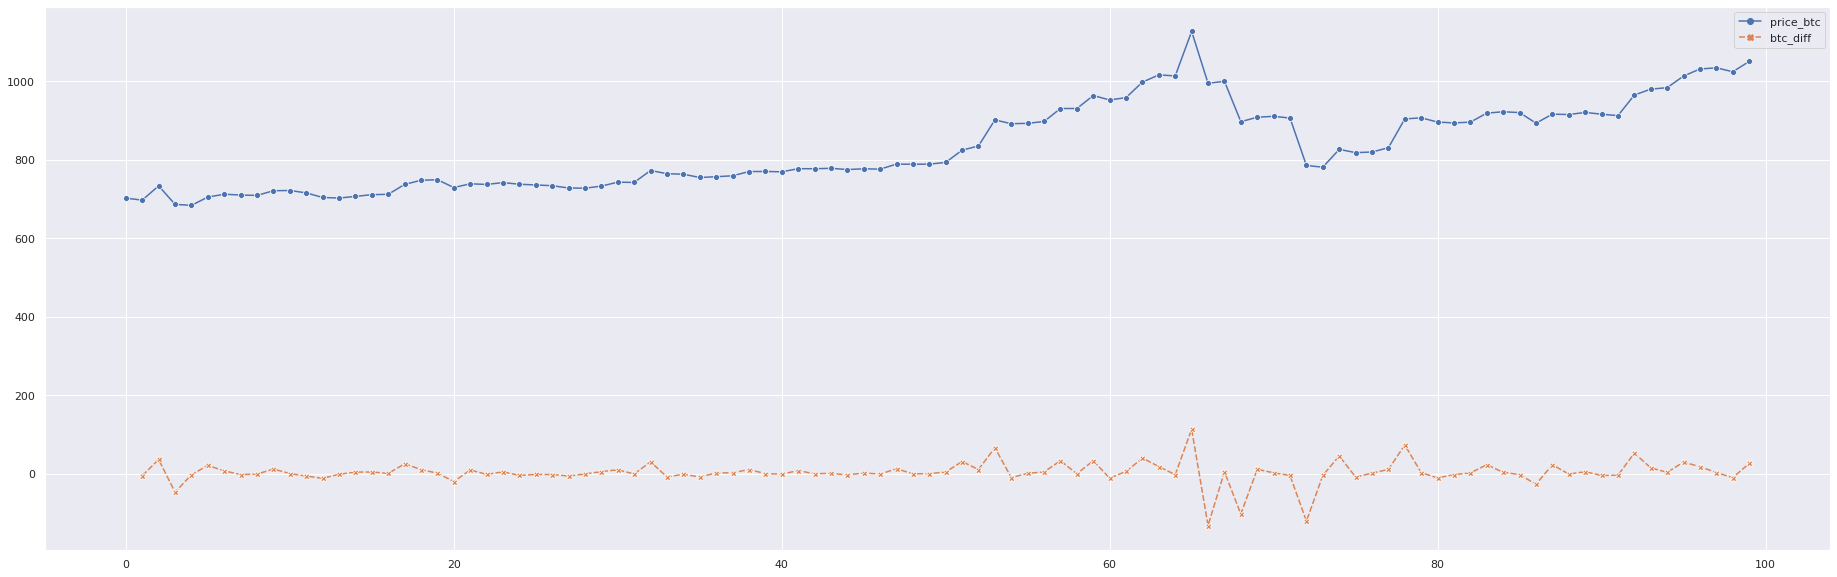

In [54]:
sns.set(rc={'figure.figsize':(32, 10)})
BTC = pd.DataFrame(data=data_stable, columns=['price_btc', 'btc_diff'])
# sns.heatmap(data=pd.DataFrame(data=data, columns=['gold_diff']))
sns.color_palette("Blues")
sns.lineplot(data=BTC, markers=True)
plt.savefig(os.path.join("data", "trading", f"stable_btc.pdf"))

<AxesSubplot:>

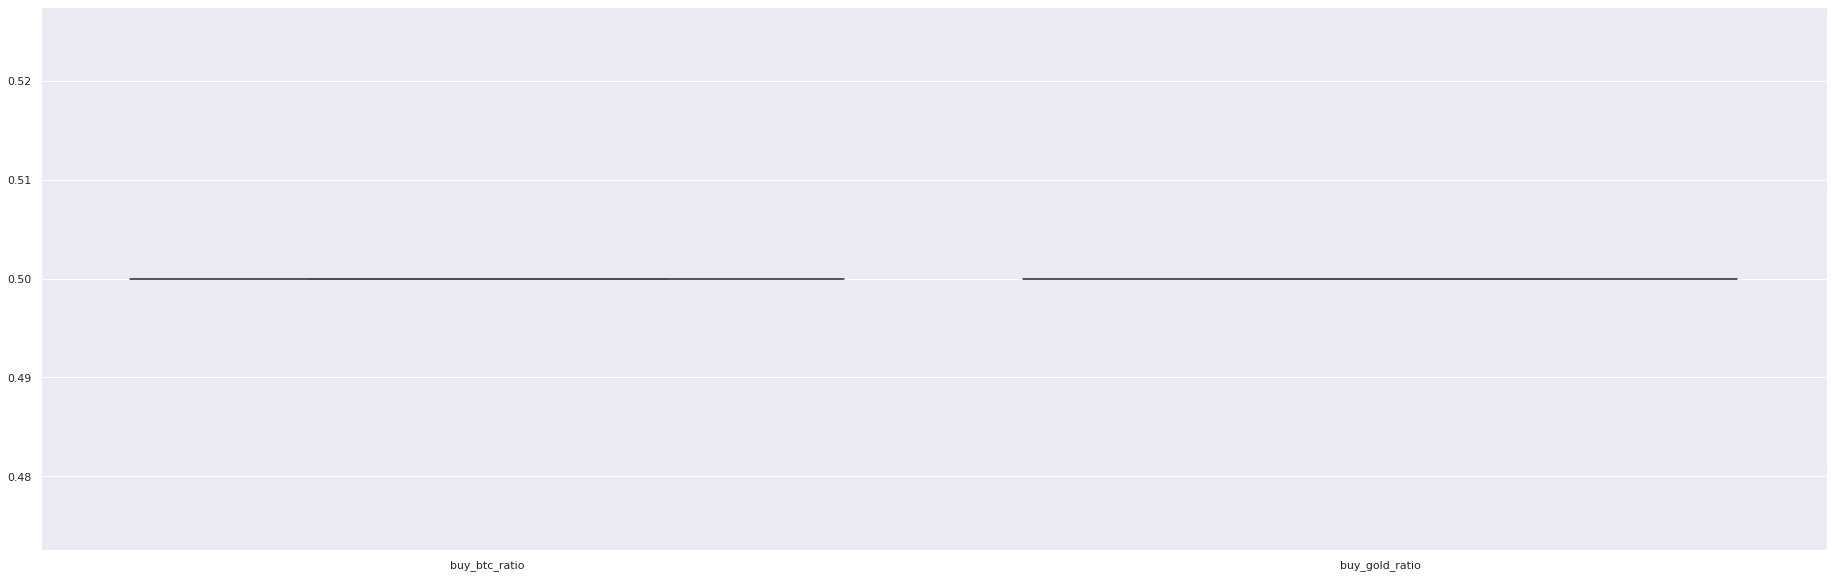

In [55]:
sns.boxplot(data=pd.DataFrame(data=data_stable, columns=['buy_btc_ratio', 'buy_gold_ratio']))

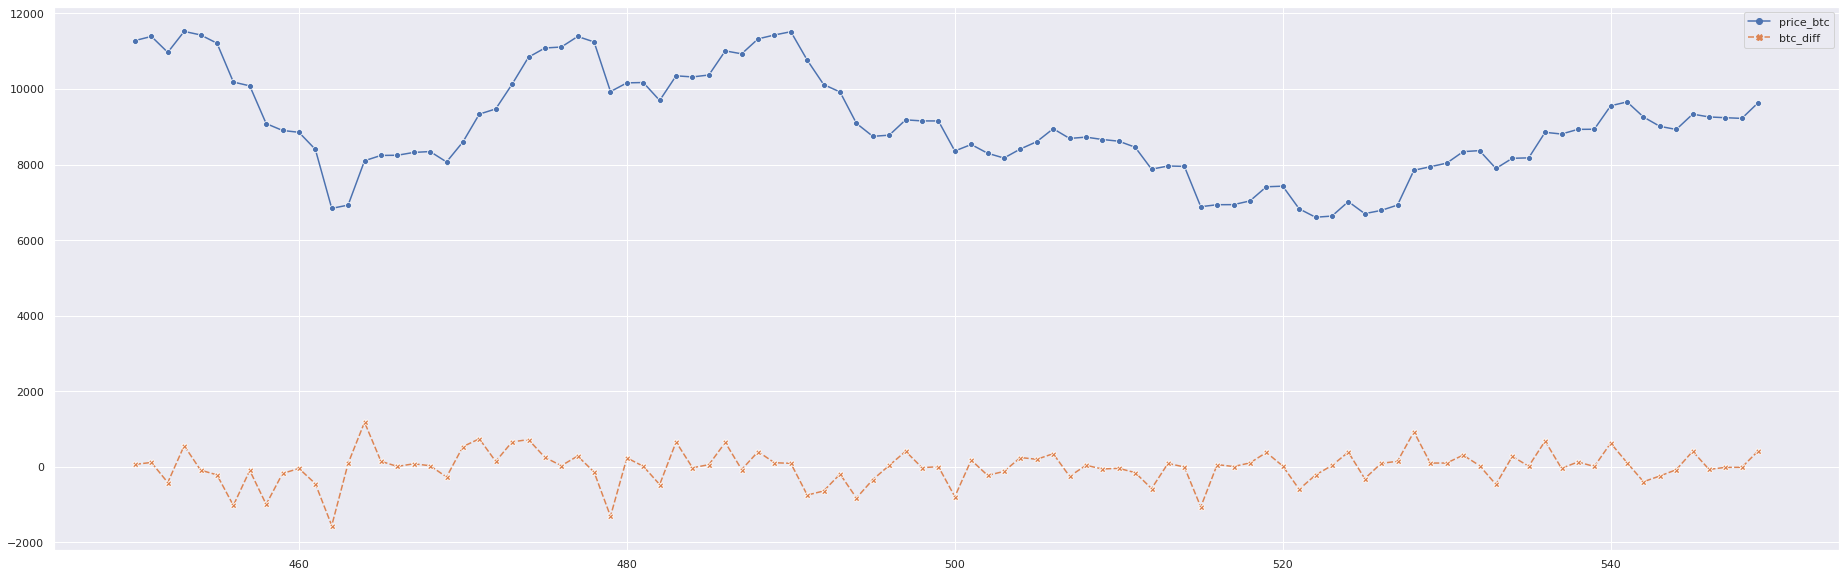

In [56]:
sns.set(rc={'figure.figsize':(32, 10)})
GLD = pd.DataFrame(data=data_turb_tiny, columns=['price_btc', 'btc_diff'])
# sns.heatmap(data=pd.DataFrame(data=data, columns=['gold_diff']))
sns.color_palette("Blues")
sns.lineplot(data=GLD, markers=True)
plt.savefig(os.path.join("data", "trading", f"turb_tiny_btc.pdf"))

<AxesSubplot:>

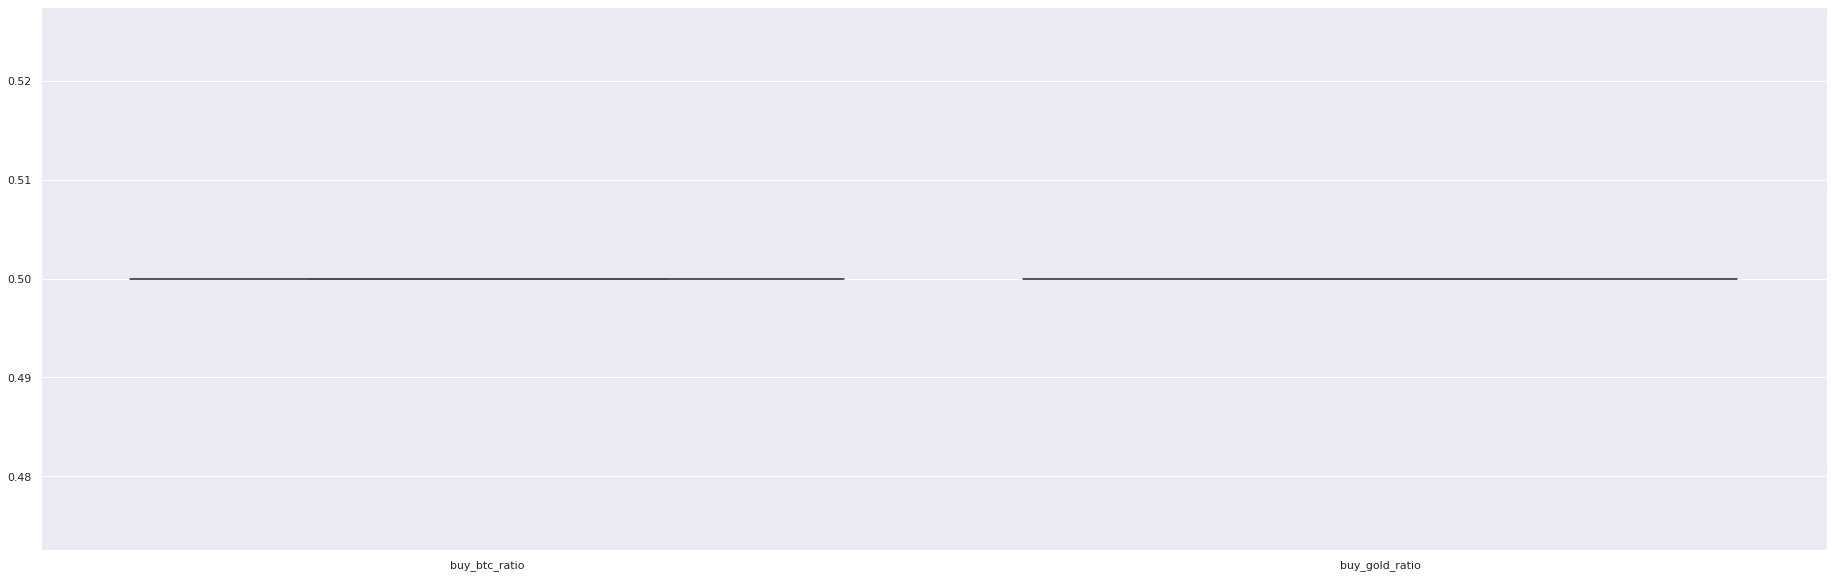

In [57]:
sns.boxplot(data=pd.DataFrame(data=data_turb_huge, columns=['buy_btc_ratio', 'buy_gold_ratio']))